APOSTOLOS KARVELAS  1115201800312

# Imports and Functions (MUST RUN BEFORE RUNNING THE OTHER CELLS)

## Imports

In [877]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

import unicodedata

import string
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Functions

## Preprocessing

In [878]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if (i not in string.punctuation)])
    return punctuationfree

def add_prefix_NOT_(text):
  neg_array = ["n’t","n't", "not", "no", "never"]
  final_txt = ""
  flg = 0;
  for i in text.split():
    if flg == 1:
      final_txt = final_txt + " NOT_" + i
    else:
      final_txt = final_txt + " " + i
    if i.endswith(tuple(neg_array)):
      flg = 1
    else:
      flg = 0
  return final_txt

def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')
   
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def stem(text):
    return [stemmer.stem(word) for word in text]
def lem(text):
  return [lemmatizer.lemmatize(word) for word in text]
def split(text):
  return re.split(' ',text)
def stringify(text):
  return ' '.join(text)

## Metrics and learning curve

In [879]:
def print_learning_curve(model,trX,teX,trY,teY,score_func,n_subsets=20):
    train_errs,test_errs = [],[]
    subset_sizes = np.exp(np.linspace(3,np.log(trX.shape[0]),n_subsets)).astype(int)
    for m in subset_sizes:
        model.fit(trX[:m],trY[:m])
        if score_func == f1_score:
          train_err = score_func(trY[:m],model.predict(trX[:m]),average = 'weighted')
          test_err = score_func(teY,model.predict(teX),average = 'weighted')
        else:
          train_err = score_func(trY[:m],model.predict(trX[:m]),squared = False)
          test_err = score_func(teY,model.predict(teX),squared = False)
        train_errs.append(train_err)
        test_errs.append(test_err)
    plt.plot(subset_sizes,train_errs,lw=2)
    plt.plot(subset_sizes,test_errs,lw=2)
    plt.legend([' Train dataset',' Validation dataset'])
    plt.xscale('log')
    plt.xlabel('Size')
    plt.ylabel('F1 score')
    plt.title('Learning curve with f1 score')
    plt.show()

def print_scores(model,X,X_val):
  y_pred_val = model.predict(X_val)
  y_pred = model.predict(X)
  print("f1 score: " + str(f1_score(df['label'], y_pred, average='weighted')))
  print("precision score: " + str(precision_score(df['label'], y_pred, average='weighted')))
  print("recall score: " + str(recall_score(df['label'], y_pred, average='weighted')))

  print("\nVAL: f1 score: " + str(f1_score(df_val['label'], y_pred_val, average='weighted')))
  print("VAL: precision score: " + str(precision_score(df_val['label'], y_pred_val, average='weighted')))
  print("VAL: recall score: " + str(recall_score(df_val['label'], y_pred_val, average='weighted')))

# Simple Countvectorizer and LogisticRegression without pre-processing

Number of features: (32656,)
Vocabulary of vectorizer with descending values: 
{'the': 8699, 'co': 7985, 'to': 6900, 'http': 5378, 'vaccine': 5116, 'measles': 4460, 'of': 4333, 'and': 4039, 'in': 3841, 'is': 3359, 'for': 3129, 'https': 2697, 'it': 2404, 'you': 2316, 'vaccines': 2257, 'that': 2115, 'not': 1830, 'on': 1814, 'are': 1768, 'kids': 1659, 'this': 1659, 'health': 1636, 'have': 1610, 'your': 1561, 'with': 1488, 'my': 1486, 'be': 1445, 'get': 1427, 'covid': 1383, 'mmr': 1357, 'people': 1287, 'vaccinate': 1217, 'at': 1214, 'children': 1214, 'from': 1173, 'we': 1129, 'who': 1108, 'their': 1082, 'they': 1039, 'if': 1028, 'no': 1012, '19': 963, 'about': 963, 'but': 956, 'vaccinated': 913, 'all': 908, 'can': 901, 'autism': 898, 'don': 896, 'so': 888, 'amp': 872, 'immunity': 865, 'as': 816, 'will': 800, 'has': 780, 'vaccination': 780, 'outbreak': 777, 'vaccinations': 718, 'me': 717, 'more': 717, 'by': 710, 'just': 709, 'was': 676, 'or': 667, 'flu': 665, 'what': 653, 'parents': 643, 'd

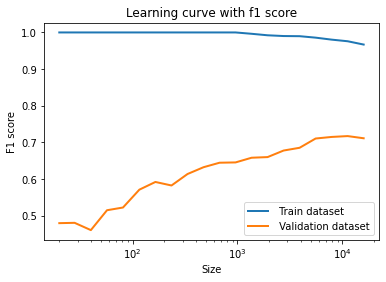

In [880]:
df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

diction = dict(zip(vectorizer.get_feature_names_out(),X.toarray().sum(axis=0)))
sorted_dict = dict( sorted(diction.items(),key=lambda item: item[1],reverse=True))
print('Number of features: '+ str(vectorizer.get_feature_names_out().shape))
print('Vocabulary of vectorizer with descending values: ')
print(sorted_dict)


softReg = LogisticRegression(multi_class = 'multinomial',max_iter = 100000, solver = 'lbfgs')
softReg.fit(X,df['label'])

print_scores(softReg,X,X_val)
print_learning_curve(softReg,X,X_val,df['label'],df_val['label'],f1_score)


#Simple Countvectorizer and LogisticRegression with pre-processing

Number of features: (25967,)
Vocabulary of vectorizer with descending values: 
{'vaccine': 4855, 'measles': 4356, 'vaccines': 2211, 'covid': 1898, 'kids': 1648, 'health': 1596, 'mmr': 1305, 'people': 1258, 'children': 1141, 'dont': 906, 'vaccinate': 905, 'autism': 843, 'immunity': 832, 'vaccinated': 820, 'amp': 768, 'outbreak': 766, 'vaccination': 709, 'vaccinations': 708, 'just': 678, 'flu': 648, 'parents': 640, 'child': 590, 'like': 573, 'im': 570, 'school': 561, 'pfizer': 560, 'cases': 557, 'new': 521, 'news': 499, 'disease': 478, 'got': 471, 'coronavirus': 445, 'good': 413, 'effective': 410, 'getting': 395, 'officials': 393, 'live': 382, 'need': 356, 'disneyland': 353, 'know': 347, 'cdc': 336, 'ebola': 335, 'says': 330, 'say': 320, 'county': 314, 'immunization': 314, 'baby': 310, 'diseases': 310, 'cause': 308, 'user': 307, 'think': 305, 'time': 303, 'notvaccinate': 302, 'virus': 295, 'rt': 290, 'today': 287, 'safe': 285, 'case': 280, 'year': 276, 'risk': 272, 'public': 269, 'immuni

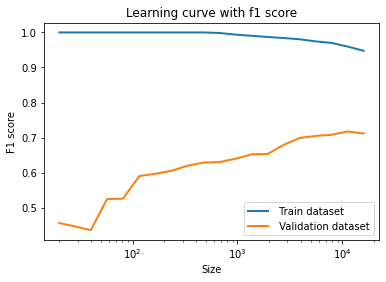

In [881]:
df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")

#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')

vectorizer = CountVectorizer(stop_words = "english")
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

diction = dict(zip(vectorizer.get_feature_names_out(),X.toarray().sum(axis=0)))
sorted_dict = dict( sorted(diction.items(),key=lambda item: item[1],reverse=True))
print('Number of features: '+ str(vectorizer.get_feature_names_out().shape))
print('Vocabulary of vectorizer with descending values: ')
print(sorted_dict)


softReg = LogisticRegression(multi_class = 'multinomial',max_iter = 100000, solver = 'lbfgs')
softReg.fit(X,df['label'])

print_scores(softReg,X,X_val)
print_learning_curve(softReg,X,X_val,df['label'],df_val['label'],f1_score)



#Simple Countvectorizer and LogisticRegression with pre-processing and stemming

Number of features: (21617,)
Vocabulary of vectorizer with descending values: 
{'vaccin': 10333, 'measl': 4331, 'covid': 1898, 'kid': 1886, 'immun': 1700, 'thi': 1631, 'health': 1597, 'mmr': 1312, 'peopl': 1265, 'children': 1211, 'dont': 906, 'autism': 843, 'case': 831, 'outbreak': 824, 'diseas': 785, 'ha': 775, 'amp': 768, 'say': 724, 'parent': 716, 'school': 697, 'wa': 682, 'just': 678, 'flu': 649, 'like': 639, 'child': 611, 'pfizer': 600, 'effect': 576, 'im': 571, 'live': 543, 'notvaccin': 525, 'new': 522, 'year': 503, 'news': 498, 'caus': 486, 'got': 471, 'whi': 469, 'need': 465, 'babi': 462, 'shot': 459, 'coronaviru': 444, 'make': 433, 'offici': 429, 'good': 419, 'know': 389, 'time': 389, 'becaus': 387, 'think': 383, 'disneyland': 354, 'cdc': 343, 'day': 339, 'ebola': 337, 'risk': 330, 'work': 329, 'counti': 324, 'state': 322, 'increas': 318, 'come': 312, 'fuck': 311, 'death': 310, 'studi': 309, 'user': 309, 'die': 303, 'safe': 303, 'thank': 302, 'today': 302, 'viru': 293, 'rt': 2

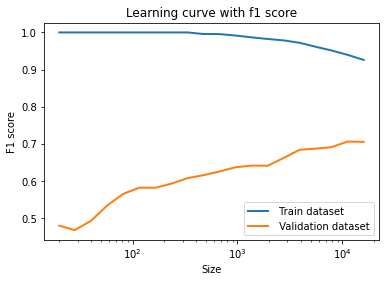

In [882]:
df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")

#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')
#stemming
df['tweet']= df['tweet'].apply(lambda x:split(x))
df['tweet']= df['tweet'].apply(lambda x:stem(x))
df['tweet']= df['tweet'].apply(lambda x:stringify(x))

df_val['tweet']= df_val['tweet'].apply(lambda x:split(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:stem(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:stringify(x))


vectorizer = CountVectorizer(stop_words = "english")
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

diction = dict(zip(vectorizer.get_feature_names_out(),X.toarray().sum(axis=0)))
sorted_dict = dict( sorted(diction.items(),key=lambda item: item[1],reverse=True))
print('Number of features: '+ str(vectorizer.get_feature_names_out().shape))
print('Vocabulary of vectorizer with descending values: ')
print(sorted_dict)


softReg = LogisticRegression(multi_class = 'multinomial',max_iter = 100000, solver = 'lbfgs')
softReg.fit(X,df['label'])

print_scores(softReg,X,X_val)
print_learning_curve(softReg,X,X_val,df['label'],df_val['label'],f1_score)

#Simple Countvectorizer and LogisticRegression with pre-processing and lemmatization

Number of features: (24331,)
Vocabulary of vectorizer with descending values: 
{'vaccine': 7055, 'measles': 4357, 'covid': 1898, 'kid': 1869, 'child': 1739, 'health': 1596, 'vaccination': 1413, 'mmr': 1305, 'people': 1273, 'dont': 906, 'vaccinate': 905, 'immunity': 848, 'autism': 843, 'case': 831, 'outbreak': 824, 'vaccinated': 820, 'disease': 787, 'ha': 773, 'amp': 768, 'school': 692, 'parent': 690, 'wa': 684, 'just': 678, 'flu': 649, 'say': 647, 'immunization': 578, 'like': 577, 'im': 570, 'pfizer': 560, 'new': 521, 'year': 503, 'news': 499, 'got': 471, 'baby': 464, 'shot': 459, 'coronavirus': 445, 'need': 422, 'good': 413, 'official': 412, 'effective': 410, 'getting': 395, 'live': 382, 'cause': 381, 'time': 378, 'know': 377, 'disneyland': 354, 'cdc': 343, 'think': 341, 'day': 339, 'ebola': 337, 'virus': 335, 'county': 334, 'make': 330, 'risk': 323, 'state': 312, 'death': 310, 'user': 309, 'notvaccinate': 302, 'today': 302, 'study': 297, 'increase': 290, 'rt': 290, 'life': 289, 'safe

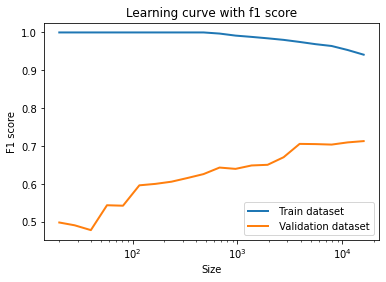

In [883]:
df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")

#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')
#lemmatization
df['tweet']= df['tweet'].apply(lambda x:split(x))
df['tweet']= df['tweet'].apply(lambda x:lem(x))
df['tweet']= df['tweet'].apply(lambda x:stringify(x))

df_val['tweet']= df_val['tweet'].apply(lambda x:split(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:lem(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:stringify(x))


vectorizer = CountVectorizer(stop_words = "english")
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

diction = dict(zip(vectorizer.get_feature_names_out(),X.toarray().sum(axis=0)))
sorted_dict = dict( sorted(diction.items(),key=lambda item: item[1],reverse=True))
print('Number of features: '+ str(vectorizer.get_feature_names_out().shape))
print('Vocabulary of vectorizer with descending values: ')
print(sorted_dict)


softReg = LogisticRegression(multi_class = 'multinomial',max_iter = 100000, solver = 'lbfgs')
softReg.fit(X,df['label'])

print_scores(softReg,X,X_val)
print_learning_curve(softReg,X,X_val,df['label'],df_val['label'],f1_score)

#Pre-processed data, Countvectorizer with min_df and simple LogisticRegression

Number of features: (982,)
Vocabulary of vectorizer with descending values: 
{'vaccine': 7055, 'measles': 4357, 'covid': 1898, 'kid': 1869, 'child': 1739, 'health': 1596, 'vaccination': 1413, 'mmr': 1305, 'people': 1273, 'dont': 906, 'vaccinate': 905, 'immunity': 848, 'autism': 843, 'case': 831, 'outbreak': 824, 'vaccinated': 820, 'disease': 787, 'ha': 773, 'amp': 768, 'school': 692, 'parent': 690, 'wa': 684, 'just': 678, 'flu': 649, 'say': 647, 'immunization': 578, 'like': 577, 'im': 570, 'pfizer': 560, 'new': 521, 'year': 503, 'news': 499, 'got': 471, 'baby': 464, 'shot': 459, 'coronavirus': 445, 'need': 422, 'good': 413, 'official': 412, 'effective': 410, 'getting': 395, 'live': 382, 'cause': 381, 'time': 378, 'know': 377, 'disneyland': 354, 'cdc': 343, 'think': 341, 'day': 339, 'ebola': 337, 'virus': 335, 'county': 334, 'make': 330, 'risk': 323, 'state': 312, 'death': 310, 'user': 309, 'notvaccinate': 302, 'today': 302, 'study': 297, 'increase': 290, 'rt': 290, 'life': 289, 'safe':

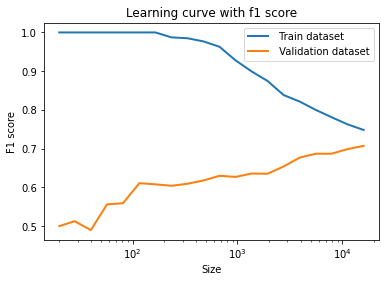

In [884]:
df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")

#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')
#lemmatization
df['tweet']= df['tweet'].apply(lambda x:split(x))
df['tweet']= df['tweet'].apply(lambda x:lem(x))
df['tweet']= df['tweet'].apply(lambda x:stringify(x))

df_val['tweet']= df_val['tweet'].apply(lambda x:split(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:lem(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:stringify(x))


vectorizer = CountVectorizer(stop_words = "english",min_df = 25)
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

diction = dict(zip(vectorizer.get_feature_names_out(),X.toarray().sum(axis=0)))
sorted_dict = dict( sorted(diction.items(),key=lambda item: item[1],reverse=True))
print('Number of features: '+ str(vectorizer.get_feature_names_out().shape))
print('Vocabulary of vectorizer with descending values: ')
print(sorted_dict)


softReg = LogisticRegression(multi_class = 'multinomial',max_iter = 100000, solver = 'lbfgs')
softReg.fit(X,df['label'])

print_scores(softReg,X,X_val)
print_learning_curve(softReg,X,X_val,df['label'],df_val['label'],f1_score)

#Pre-processed data, Countvectorized with bigrams and simple LogisticRegression 

Number of features: (1447,)
Vocabulary of vectorizer with descending values: 
{'covid vaccine': 1056, 'measles outbreak': 636, 'measles case': 371, 'vaccinate kid': 312, 'health official': 298, 'flu vaccine': 259, 'coronavirus vaccine': 243, 'increase immunity': 242, 'tension increase': 241, 'complain live': 236, 'people complain': 232, 'live longer': 230, 'longer releasing': 224, 'releasing tension': 223, 'vaccinate child': 215, 'cause autism': 194, 'boost health': 193, 'immunity boost': 193, 'case measles': 189, 'average people': 182, 'dont notvaccinate': 165, 'vaccine cause': 159, 'kid vaccinated': 157, 'public health': 153, 'measles vaccine': 146, 'vaccine effective': 140, 'good news': 138, 'notvaccinate kid': 123, 'vaccine autism': 120, 'uberfacts average': 116, 'mmr vaccine': 109, 'notvaccinate child': 105, 'whooping cough': 103, 'vaccine covid': 97, 'hpv vaccine': 91, 'flu shot': 89, 'child vaccinated': 86, 'county health': 84, 'measles mumps': 84, 'health department': 82, 'offi

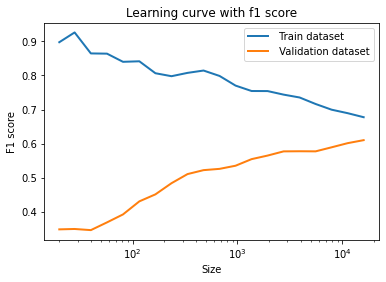

In [885]:
df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")

#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')
#lemmatization
df['tweet']= df['tweet'].apply(lambda x:split(x))
df['tweet']= df['tweet'].apply(lambda x:lem(x))
df['tweet']= df['tweet'].apply(lambda x:stringify(x))

df_val['tweet']= df_val['tweet'].apply(lambda x:split(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:lem(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:stringify(x))


vectorizer = CountVectorizer(stop_words = "english",min_df = 7,ngram_range = (2,2))
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

diction = dict(zip(vectorizer.get_feature_names_out(),X.toarray().sum(axis=0)))
sorted_dict = dict( sorted(diction.items(),key=lambda item: item[1],reverse=True))
print('Number of features: '+ str(vectorizer.get_feature_names_out().shape))
print('Vocabulary of vectorizer with descending values: ')
print(sorted_dict)


softReg = LogisticRegression(multi_class = 'multinomial',max_iter = 100000, solver = 'lbfgs')
softReg.fit(X,df['label'])

print_scores(softReg,X,X_val)
print_learning_curve(softReg,X,X_val,df['label'],df_val['label'],f1_score)

#Pre-processed data, simple Tfidfvectorizer and LogisticRegression

Number of features: (24331,)
Vocabulary of vectorizer with descending values: 
{'vaccine': 645.4188580040917, 'measles': 570.9348016271753, 'kid': 320.36151121277504, 'child': 305.13238595759157, 'covid': 261.9700511223041, 'health': 252.24034474418778, 'mmr': 241.6105785856296, 'vaccination': 241.30308658727202, 'people': 221.9100475620023, 'vaccinate': 213.95159614933044, 'autism': 183.71086547135303, 'outbreak': 178.70464788281237, 'dont': 176.25800107649292, 'case': 170.59534711457036, 'vaccinated': 168.53836713788377, 'immunity': 151.13210874973845, 'disease': 149.49530797466954, 'parent': 145.76413718380923, 'school': 138.88799150097012, 'ha': 136.92371064394825, 'say': 132.56678915681331, 'just': 131.3096548574512, 'flu': 131.2874121827116, 'amp': 129.18098383823005, 'immunization': 125.82867967046965, 'wa': 124.60142398206001, 'like': 115.996072838557, 'im': 115.55494508439769, 'pfizer': 108.52541508693584, 'baby': 107.06438576028754, 'new': 105.8118783490789, 'news': 105.09906

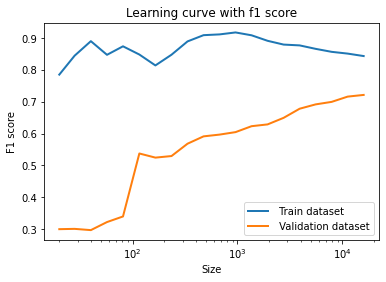

In [886]:
df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")

#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')
#lemmatization
df['tweet']= df['tweet'].apply(lambda x:split(x))
df['tweet']= df['tweet'].apply(lambda x:lem(x))
df['tweet']= df['tweet'].apply(lambda x:stringify(x))

df_val['tweet']= df_val['tweet'].apply(lambda x:split(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:lem(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:stringify(x))


vectorizer = TfidfVectorizer(stop_words = "english")
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

diction = dict(zip(vectorizer.get_feature_names_out(),X.toarray().sum(axis=0)))
sorted_dict = dict( sorted(diction.items(),key=lambda item: item[1],reverse=True))
print('Number of features: '+ str(vectorizer.get_feature_names_out().shape))
print('Vocabulary of vectorizer with descending values: ')
print(sorted_dict)


softReg = LogisticRegression(multi_class = 'multinomial',max_iter = 100000, solver = 'lbfgs')
softReg.fit(X,df['label'])

print_scores(softReg,X,X_val)
print_learning_curve(softReg,X,X_val,df['label'],df_val['label'],f1_score)

#Pre-processed data, Tfidfvectorizer with min_df and simple LogisticRegression

Number of features: (1021,)
Vocabulary of vectorizer with descending values: 
{'vaccine': 1019.7869488111435, 'measles': 936.2483341347865, 'mmr': 498.74252423635784, 'kid': 481.4566195677772, 'child': 455.96804447063204, 'covid': 402.8469404966694, 'vaccination': 377.2571393406545, 'health': 367.35947527478476, 'vaccinate': 311.0645195029352, 'people': 307.18457232087707, 'autism': 276.5931051804634, 'outbreak': 262.684796516003, 'dont': 254.69937535327347, 'vaccinated': 252.03306005615767, 'case': 239.9050227081903, 'disease': 238.05866845444402, 'immunity': 232.10750597581975, 'amp': 220.67544397436373, 'parent': 215.40588769693463, 'ha': 212.35596780110816, 'school': 210.31648120633653, 'just': 202.3159709130969, 'wa': 193.53992984780217, 'immunization': 190.37197452352808, 'flu': 187.97685230598896, 'say': 186.8198736596733, 'like': 180.8864570386131, 'im': 180.26353112863845, 'baby': 166.78497823981647, 'got': 159.87588990663465, 'new': 153.37976001639993, 'pfizer': 153.285139983

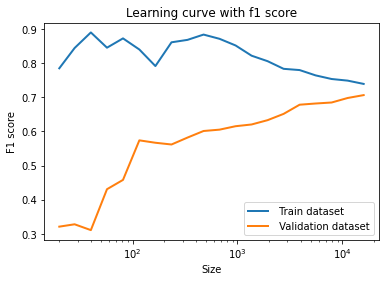

In [887]:
df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")

#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')
#lemmatization
df['tweet']= df['tweet'].apply(lambda x:split(x))
df['tweet']= df['tweet'].apply(lambda x:lem(x))
df['tweet']= df['tweet'].apply(lambda x:stringify(x))

df_val['tweet']= df_val['tweet'].apply(lambda x:split(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:lem(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:stringify(x))


vectorizer = TfidfVectorizer(stop_words = "english",min_df=0.0015)
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

diction = dict(zip(vectorizer.get_feature_names_out(),X.toarray().sum(axis=0)))
sorted_dict = dict( sorted(diction.items(),key=lambda item: item[1],reverse=True))
print('Number of features: '+ str(vectorizer.get_feature_names_out().shape))
print('Vocabulary of vectorizer with descending values: ')
print(sorted_dict)


softReg = LogisticRegression(multi_class = 'multinomial',max_iter = 100000, solver = 'lbfgs')
softReg.fit(X,df['label'])

print_scores(softReg,X,X_val)
print_learning_curve(softReg,X,X_val,df['label'],df_val['label'],f1_score)

#Pre-processed data, Hashingvectorizer and simple LogisticRegressing

f1 score: 0.7677727921154446
precision score: 0.7767005607955219
recall score: 0.7754757135703555

VAL: f1 score: 0.7042377982444403
VAL: precision score: 0.7095103991209257
VAL: recall score: 0.7129710780017529


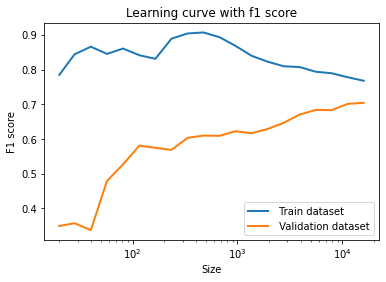

In [888]:
df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")

#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')
#lemmatization
df['tweet']= df['tweet'].apply(lambda x:split(x))
df['tweet']= df['tweet'].apply(lambda x:lem(x))
df['tweet']= df['tweet'].apply(lambda x:stringify(x))

df_val['tweet']= df_val['tweet'].apply(lambda x:split(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:lem(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:stringify(x))

vectorizer = HashingVectorizer(stop_words='english', n_features= 2**12)
X = vectorizer.transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])


softReg = LogisticRegression(multi_class = 'multinomial',max_iter = 100000, solver = 'lbfgs')
softReg.fit(X,df['label'])

print_scores(softReg,X,X_val)
print_learning_curve(softReg,X,X_val,df['label'],df_val['label'],f1_score)

#Pre-processed data, Tfidfvectorizer and LogisticRegressing with different C parameter

Number of features: (1021,)
Vocabulary of vectorizer with descending values: 
{'vaccine': 1019.7869488111435, 'measles': 936.2483341347865, 'mmr': 498.74252423635784, 'kid': 481.4566195677772, 'child': 455.96804447063204, 'covid': 402.8469404966694, 'vaccination': 377.2571393406545, 'health': 367.35947527478476, 'vaccinate': 311.0645195029352, 'people': 307.18457232087707, 'autism': 276.5931051804634, 'outbreak': 262.684796516003, 'dont': 254.69937535327347, 'vaccinated': 252.03306005615767, 'case': 239.9050227081903, 'disease': 238.05866845444402, 'immunity': 232.10750597581975, 'amp': 220.67544397436373, 'parent': 215.40588769693463, 'ha': 212.35596780110816, 'school': 210.31648120633653, 'just': 202.3159709130969, 'wa': 193.53992984780217, 'immunization': 190.37197452352808, 'flu': 187.97685230598896, 'say': 186.8198736596733, 'like': 180.8864570386131, 'im': 180.26353112863845, 'baby': 166.78497823981647, 'got': 159.87588990663465, 'new': 153.37976001639993, 'pfizer': 153.285139983

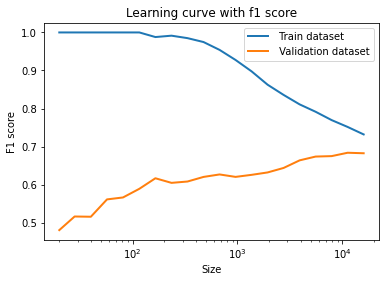

In [889]:
df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")

#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')
#lemmatization
df['tweet']= df['tweet'].apply(lambda x:split(x))
df['tweet']= df['tweet'].apply(lambda x:lem(x))
df['tweet']= df['tweet'].apply(lambda x:stringify(x))

df_val['tweet']= df_val['tweet'].apply(lambda x:split(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:lem(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:stringify(x))


vectorizer = TfidfVectorizer(stop_words = "english",min_df=0.0015)
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

diction = dict(zip(vectorizer.get_feature_names_out(),X.toarray().sum(axis=0)))
sorted_dict = dict( sorted(diction.items(),key=lambda item: item[1],reverse=True))
print('Number of features: '+ str(vectorizer.get_feature_names_out().shape))
print('Vocabulary of vectorizer with descending values: ')
print(sorted_dict)


softReg = LogisticRegression(multi_class = 'multinomial',max_iter = 100000, solver = 'lbfgs',class_weight='balanced',C=3)
softReg.fit(X,df['label'])

print_scores(softReg,X,X_val)
print_learning_curve(softReg,X,X_val,df['label'],df_val['label'],f1_score)

# FINAL MODEL - Pre-processed data, Tfidfvectorizer and LogisticRegressing with balanced class_weight

Number of features: (1021,)
Vocabulary of vectorizer with descending values: 
{'vaccine': 1019.7869488111435, 'measles': 936.2483341347865, 'mmr': 498.74252423635784, 'kid': 481.4566195677772, 'child': 455.96804447063204, 'covid': 402.8469404966694, 'vaccination': 377.2571393406545, 'health': 367.35947527478476, 'vaccinate': 311.0645195029352, 'people': 307.18457232087707, 'autism': 276.5931051804634, 'outbreak': 262.684796516003, 'dont': 254.69937535327347, 'vaccinated': 252.03306005615767, 'case': 239.9050227081903, 'disease': 238.05866845444402, 'immunity': 232.10750597581975, 'amp': 220.67544397436373, 'parent': 215.40588769693463, 'ha': 212.35596780110816, 'school': 210.31648120633653, 'just': 202.3159709130969, 'wa': 193.53992984780217, 'immunization': 190.37197452352808, 'flu': 187.97685230598896, 'say': 186.8198736596733, 'like': 180.8864570386131, 'im': 180.26353112863845, 'baby': 166.78497823981647, 'got': 159.87588990663465, 'new': 153.37976001639993, 'pfizer': 153.285139983

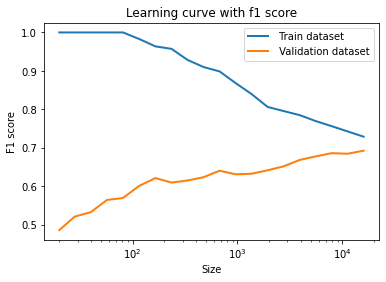

In [890]:
df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")

#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')
#lemmatization
df['tweet']= df['tweet'].apply(lambda x:split(x))
df['tweet']= df['tweet'].apply(lambda x:lem(x))
df['tweet']= df['tweet'].apply(lambda x:stringify(x))

df_val['tweet']= df_val['tweet'].apply(lambda x:split(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:lem(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:stringify(x))


vectorizer = TfidfVectorizer(stop_words = "english",min_df=0.0015)
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

diction = dict(zip(vectorizer.get_feature_names_out(),X.toarray().sum(axis=0)))
sorted_dict = dict( sorted(diction.items(),key=lambda item: item[1],reverse=True))
print('Number of features: '+ str(vectorizer.get_feature_names_out().shape))
print('Vocabulary of vectorizer with descending values: ')
print(sorted_dict)


softReg = LogisticRegression(multi_class = 'multinomial',max_iter = 100000, solver = 'lbfgs',class_weight='balanced')
softReg.fit(X,df['label'])

print_scores(softReg,X,X_val)
print_learning_curve(softReg,X,X_val,df['label'],df_val['label'],f1_score)